# Dataset sul Traffico di Rete

Il dataset che useremo in questa esercitazione contiene caratteristiche estratte da sessioni di traffico di rete, progettate per l'analisi e il rilevamento di malware basato sul comportamento della rete. Le caratteristiche sono organizzate in diverse categorie funzionali.

## Categorie principali di caratteristiche

### Informazioni sulla sessione
- **Informazioni temporali**: `start`, `duration`, `cap_date`, `daysTime`, `weekDay`
- **Informazioni di connessione**: Indirizzi IP e porte (`...ip`, `...port`)
- **Etichette**: `label`, `labelSS` (classificazione del malware)

### Metriche TCP/IP
- **Statistiche pacchetti**: Conteggio pacchetti (`packets_...`), dimensioni (`packetsize...`), rapporti (`packetsAB_ratio`)
- **Flag TCP**: Pacchetti ACK (`ack_...`), PUSH (`push_...`), RESET (`reset_...`), URG (`urg_...`)
- **Tempi di arrivo**: Tempi tra pacchetti (`packetinterarrivel_...`)
- **Time-to-live**: Valori TTL per pacchetti client/server (`ttl_...`, `ttlA...`, `ttlB...`)
- **Analisi TCP**: Pacchetti persi, ritrasmessi (`tcpanalysis...`)
- **Bytes trasferiti**: Totali e rapporti (`bytes_...`, `bytesAB_ratio`)

### Protocollo HTTP
- **Richieste HTTP**: Metodi GET/POST (`http_GET`, `http_POST`), conteggi (`httpcount...`)
- **Bytes HTTP**: Dimensioni richieste/risposte (`httpreqbytes_...`, `httprespbytes_...`)
- **Tempi HTTP**: Tempi di risposta (`httptime...`), tempi tra richiesta e risposta (`httpinterarrivel_...`)
- **Cookie**: Conteggio e valori (`httpcookiecount`, `httpcookievalues_...`)
- **Host dominante**: URL, rank Alexa, tipo di browser (`httpdom...`)
- **Classificazione URL**: Identificatori per CDN, ad, cloud, ecc. (`iscdnhttp`, `isadhttp`, `iscloudhttp`, etc.)

### Protocollo DNS
- **Risposta DNS**: Conteggio indirizzi, risposte, flag (`dnscountaddresses`, `dns_flag`)
- **Hostname DNS**: Nome host, TTL (`dnshostname`, `dnsminttl`)
- **Tempi DNS**: Tempo di risposta (`dns_time`)
- **Rank Alexa**: Rank del server nella risposta DNS (`dns_alexaRank`)

### Protocollo SSL/TLS
- **Handshake SSL**: Durata (`sslhandshakeduration_...`)
- **Bytes SSL**: Bytes richiesta/risposta (`sslreqbytes_...`, `sslrespbytes_...`)
- **Certificati**: Conteggio, rapporti (`sslcountcertificates`, `sslratio...`)
- **Cifrari e algoritmi**: Conteggio cifrari supportati (`sslcountclient_...`, `sslcountserver_...`)
- **Versioni SSL**: Numero di versioni, versione dominante (`ssldomserver_ciphersuite`, `ssldomserver_compression`)

### Informazioni geografiche e di routing
- **ASN**: Numero di sistemi autonomi (`asn_...`)
- **Paesi**: Numero di paesi per client/server (`country_...`)


# Obiettivo
  Partendo dalle varie features che corrispondono a come un dispositivo interagisce nella rete, bisogna classificare la tipologia di dispositivo (`device_category`)

In [1]:
import pandas as pd
df = pd.read_csv('datasets/iot_device_test.csv')

### Stampiamo le colonne

In [2]:
df.columns

Index(['ack', 'ack_A', 'ack_B', 'bytes', 'bytes_A', 'bytes_A_B_ratio',
       'bytes_B', 'ds_field_A', 'ds_field_B', 'duration',
       ...
       'suffix_is_co.il', 'suffix_is_com', 'suffix_is_com.sg',
       'suffix_is_else', 'suffix_is_empty_char_value',
       'suffix_is_googleapis.com', 'suffix_is_net', 'suffix_is_org',
       'suffix_is_unresolved', 'device_category'],
      dtype='object', length=298)

### Vediamo che tipologia di valori dobbiamo classificare

In [3]:
df["device_category"]

0      baby_monitor
1      baby_monitor
2      baby_monitor
3      baby_monitor
4      baby_monitor
           ...     
895           watch
896           watch
897           watch
898           watch
899           watch
Name: device_category, Length: 900, dtype: object

In [4]:
#Vediamo quali sono i device che abbiamo
df["device_category"].unique()

array(['baby_monitor', 'lights', 'motion_sensor', 'security_camera',
       'smoke_detector', 'socket', 'thermostat', 'TV', 'watch'],
      dtype=object)

In [5]:
#Vediamo come sono distribuiti i device
df["device_category"].value_counts()
#Abbiamo quindi un dataset bilanciato.

device_category
baby_monitor       100
lights             100
motion_sensor      100
security_camera    100
smoke_detector     100
socket             100
thermostat         100
TV                 100
watch              100
Name: count, dtype: int64

In [6]:
#Per ogni categoria dobbiamo assegnare un id che funziona da label per la classificazione
devices = df["device_category"].unique()


In [7]:
device_id_mapping = {i: device for i, device in enumerate(devices)}
print(device_id_mapping)

{0: 'baby_monitor', 1: 'lights', 2: 'motion_sensor', 3: 'security_camera', 4: 'smoke_detector', 5: 'socket', 6: 'thermostat', 7: 'TV', 8: 'watch'}


In [8]:
df['device_category'] = df['device_category'].map({device: i for i, device in enumerate(devices)})


In [9]:
df['device_category']

0      0
1      0
2      0
3      0
4      0
      ..
895    8
896    8
897    8
898    8
899    8
Name: device_category, Length: 900, dtype: int64

### Proviamo a filtrare qualche colonna in base al modulo della correlazione

In [10]:
# Calcolo le correlazioni con la variabile target
correlations = df.corrwith(df['device_category'])
# Filtro le features con correlazione superiore a 0.3 in valore assoluto
significant_features = correlations[abs(correlations) > 0.3].index.tolist()
# Rimuovo la variabile target dall'elenco delle features se presente
if 'device_category' in significant_features:
    significant_features.remove('device_category')

# Creao un nuovo DataFrame con solo le features significative e la variabile target
df = df[significant_features + ['device_category']]
# Visualizzare le dimensioni del nuovo DataFrame
print(f"Dimensioni del nuovo DataFrame: {df.shape}")
print(f"Features selezionate: {len(significant_features)}")

Dimensioni del nuovo DataFrame: (900, 23)
Features selezionate: 22


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
df.head()

,packet_size_A_entropy,packet_size_A_thirdQ,packet_size_avg,packet_size_max,reset_A,reset_B,ssl_count_client_compressions,ssl_count_client_mac_algs,ssl_count_server_ciphersuite,ssl_count_server_compression,...,ssl_count_version,ssl_dom_version,ssl_ratio_server_name,ssl_req_bytes_min,ttl_B_min,ttl_B_stdev,ttl_max,ttl_thirdQ,is_ssl,device_category
0,1.653997,85.5,300.487805,1400,2,0,1,1,1,1,...,1,769,1,32,33,45.201365,225,225.0,1,0
1,1.653997,85.5,300.487805,1400,2,0,1,1,1,1,...,1,769,1,32,33,45.437057,226,226.0,1,0
2,1.653997,85.5,302.048780,1400,2,0,1,1,1,1,...,1,769,1,32,35,45.463948,228,228.0,1,0
3,1.653997,85.5,302.048780,1400,2,0,1,1,1,1,...,1,769,1,32,34,45.699645,228,228.0,1,0
4,1.653997,85.5,279.636364,1400,2,0,1,1,1,1,...,1,769,1,32,34,42.095300,227,227.0,1,0


Abbiamo tanti zeri e uni... Contiamo se ci sono null e filtriamo orizzontalmente in base alla varianza di ogni colonna

In [12]:
# Verifica dei valori NaN
nan_counts = df.isna().sum()
print(f"Colonne con valori NaN:")
print(nan_counts[nan_counts > 0])

Colonne con valori NaN:
Series([], dtype: int64)


In [13]:
import pandas as pd
import numpy as np

def normalize_variance(df):
        return df.var() / df.max()

# Calcola la varianza normalizzata
varianza_norm = normalize_variance(df)

# Ordina le colonne in base alla varianza normalizzata (dal più alto al più basso)
varianza_ordinata = varianza_norm.sort_values(ascending=False)

# Seleziona i nomi delle prime 10 colonne con varianza più alta
top_10_colonne = varianza_ordinata.head(10).index.tolist()

# Stampa i nomi e i valori delle prime 10 colonne
print("Top 10 colonne con varianza normalizzata più alta:")
for colonna in top_10_colonne:
    print(f"{colonna}: {varianza_norm[colonna]}")


df_top_10 = df[top_10_colonne]


Top 10 colonne con varianza normalizzata più alta:
packet_size_max: 247.06329633551908
ssl_dom_version: 190.8223111570862
packet_size_A_thirdQ: 149.26704048019488
packet_size_avg: 34.20503208629437
ttl_thirdQ: 32.72011030653765
ttl_max: 32.40511487709656
ssl_req_bytes_min: 31.008941001977472
ttl_B_min: 12.559702108515637
ttl_B_stdev: 2.125593255157554
device_category: 0.8342602892102335


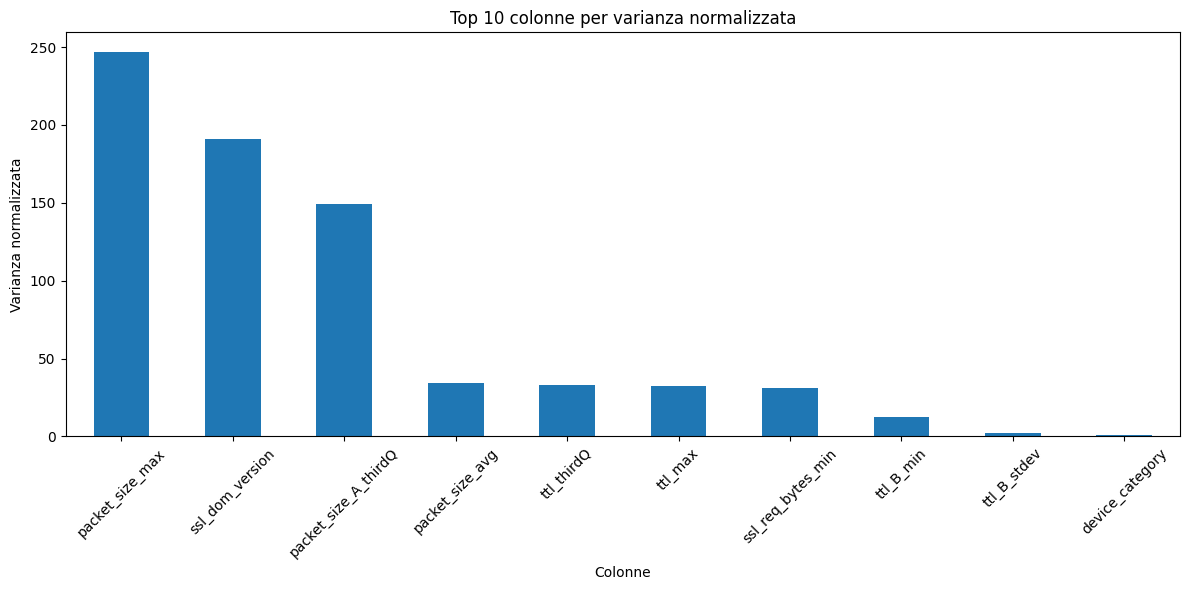

In [14]:
import matplotlib.pyplot as plt

# Visualizza le top 10 colonne con un grafico a barre
plt.figure(figsize=(12, 6))
varianza_ordinata.head(10).plot(kind='bar')
plt.title('Top 10 colonne per varianza normalizzata')
plt.ylabel('Varianza normalizzata')
plt.xlabel('Colonne')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df_top_10["device_category"] = df['device_category']
cleaned_df = df_top_10

C:\Users\luigi\AppData\Local\Temp\ipykernel_181416\136956294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10["device_category"] = df['device_category']


In [16]:
cleaned_df

,packet_size_max,ssl_dom_version,packet_size_A_thirdQ,packet_size_avg,ttl_thirdQ,ttl_max,ssl_req_bytes_min,ttl_B_min,ttl_B_stdev,device_category
0,1400,769,85.50,300.487805,225.0,225,32,33,45.201365,0
1,1400,769,85.50,300.487805,226.0,226,32,33,45.437057,0
2,1400,769,85.50,302.048780,228.0,228,32,35,45.463948,0
3,1400,769,85.50,302.048780,228.0,228,32,34,45.699645,0
4,1400,769,85.50,279.636364,227.0,227,32,34,42.095300,0
...,...,...,...,...,...,...,...,...,...,...
895,1388,771,0.00,734.094340,64.0,64,985,52,0.197893,8
896,1388,771,23.25,230.269231,64.0,64,1057,53,0.522233,8
897,1388,771,69.50,255.863636,64.0,64,785,51,0.452267,8
898,1388,771,0.00,185.806452,64.0,64,760,52,0.500000,8


In [17]:
class MultinomialLogisticRegression:
    """
    Implementazione della regressione logistica multinomiale (softmax)
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Inizializzazione del modello
        
        Parametri:
        learning_rate: tasso di apprendimento per la discesa del gradiente
        n_iterations: numero di iterazioni per la discesa del gradiente
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.classes = None
        self.cost_history = []

    def _softmax(self, z):
        """
        Funzione softmax: converte punteggi in probabilità normalizzate
        
        La funzione softmax è definita come:
        softmax(z_i) = exp(z_i) / sum(exp(z_j)) per j=1...K
        
        Per evitare overflow, sottraiamo il valore massimo da ogni z
        """
        # Sottraiamo il massimo per stabilità numerica
        shift_z = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(shift_z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def fit(self, X, y):
        """
        Addestra il modello multinomiale
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        y -- vettore delle etichette di shape (m,)
        """
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_samples, n_features = X.shape
        
        # Aggiungiamo una colonna di 1 per il termine di bias
        X_bias = np.c_[np.ones((n_samples, 1)), X]
        n_features_bias = X_bias.shape[1]
        
        # Inizializziamo i pesi: una matrice di shape (n_features+1, n_classes)
        self.weights = np.zeros((n_features_bias, n_classes))
        
        # Convertiamo le etichette in formato one-hot
        y_one_hot = np.zeros((n_samples, n_classes))
        print(f"classi: {self.classes}")
        for i in range(n_samples):
            class_idx = np.where(self.classes == y[i])[0][0]
            y_one_hot[i, class_idx] = 1
        
        print("Avvio addestramento multinomiale...")
        
        for i in range(self.n_iterations):
            # Calcolo delle probabilità usando softmax
            scores = np.dot(X_bias, self.weights)  # shape: (m, K)
            probs = self._softmax(scores)  # shape: (m, K)
            
            # Calcolo del gradiente della cross-entropy
            # Formula: gradiente = (1/m) * X^T * (probs - y_one_hot)
            gradients = 1/n_samples * np.dot(X_bias.T, (probs - y_one_hot))
            
            # Aggiornamento dei pesi
            self.weights = self.weights - self.learning_rate * gradients
            
            # Calcolo e salvataggio del costo
            cost = self._compute_cost(X_bias, y_one_hot)
            self.cost_history.append(cost)
            
            # Stampa periodica del costo
            if (i % 100 == 0) or (i == self.n_iterations - 1):
                print(f"Iterazione {i}: Costo = {cost:.6f}")
        
        print("Addestramento multinomiale completato!")
        
        # Calcoliamo l'accuratezza sul training set
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        print(f"Accuratezza sul training set: {accuracy:.4f}")
    
    def _compute_cost(self, X, y_one_hot):
        """
        Calcola la funzione di costo (cross-entropy)
        
        J(W) = -(1/m) * sum(sum(y_ij * log(p_ij)))
        
        dove:
        y_ij = 1 se l'esempio i appartiene alla classe j, 0 altrimenti
        p_ij = probabilità predetta che l'esempio i appartenga alla classe j
        """
        m = X.shape[0]
        scores = np.dot(X, self.weights)
        probs = self._softmax(scores)
        
        # Aggiungiamo un valore piccolo per evitare log(0)
        epsilon = 1e-15
        probs = np.clip(probs, epsilon, 1 - epsilon)
        
        # Calcoliamo la cross-entropy: -sum(y_true * log(y_pred))
        log_probs = y_one_hot * np.log(probs)
        cost = -np.sum(log_probs) / m
        
        return cost
    
    def predict_proba(self, X):
        """
        Calcola le probabilità per tutte le classi
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        
        Restituisce:
        probs -- matrice di probabilità di shape (m, n_classes)
        """
        # Aggiungiamo una colonna di 1 per il termine di bias
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Calcoliamo i punteggi e applichiamo softmax
        scores = np.dot(X_bias, self.weights)
        probs = self._softmax(scores)
        
        return probs
    
    def predict(self, X):
        """
        Predice la classe con la probabilità più alta
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        
        Restituisce:
        y_pred -- vettore delle classi predette di shape (m,)
        """
        probs = self.predict_proba(X)
        return self.classes[np.argmax(probs, axis=1)]
    
    def plot_cost_history(self):
        """
        Visualizza l'andamento della funzione di costo durante l'addestramento
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.n_iterations), self.cost_history)
        plt.xlabel('Iterazioni')
        plt.ylabel('Costo (Cross-Entropy)')
        plt.title('Andamento della funzione di costo')
        plt.grid(True)
        plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Dividi il dataframe in set di addestramento e test con stratificazione
X = cleaned_df.drop(columns=['device_category'])
y = cleaned_df['device_category']

# Utilizza train_test_split con stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Visualizza le dimensioni dei set di addestramento e test
print(f"Dimensioni del set di addestramento: {X_train.shape}")
print(f"Dimensioni del set di test: {X_test.shape}")

Dimensioni del set di addestramento: (720, 9)
Dimensioni del set di test: (180, 9)


In [19]:
y_train.reset_index(drop=True, inplace=True)

classi: [0 1 2 3 4 5 6 7 8]
Avvio addestramento multinomiale...
Iterazione 0: Costo = 22.097837
Iterazione 100: Costo = 18.181137
Iterazione 200: Costo = 16.589418
Iterazione 300: Costo = 15.381564
Iterazione 400: Costo = 16.720829
Iterazione 500: Costo = 17.568849
Iterazione 600: Costo = 14.205734
Iterazione 700: Costo = 17.402729
Iterazione 800: Costo = 16.667543
Iterazione 900: Costo = 12.415767
Iterazione 1000: Costo = 15.901002
Iterazione 1100: Costo = 15.559417
Iterazione 1200: Costo = 15.238492
Iterazione 1300: Costo = 14.102529
Iterazione 1400: Costo = 16.357948
Iterazione 1500: Costo = 17.573847
Iterazione 1600: Costo = 16.306967
Iterazione 1700: Costo = 13.335829
Iterazione 1800: Costo = 13.732454
Iterazione 1900: Costo = 15.529632
Iterazione 2000: Costo = 12.720102
Iterazione 2100: Costo = 16.006411
Iterazione 2200: Costo = 14.952358
Iterazione 2300: Costo = 15.974817
Iterazione 2400: Costo = 13.528023
Iterazione 2500: Costo = 14.303042
Iterazione 2600: Costo = 15.143434
Ite

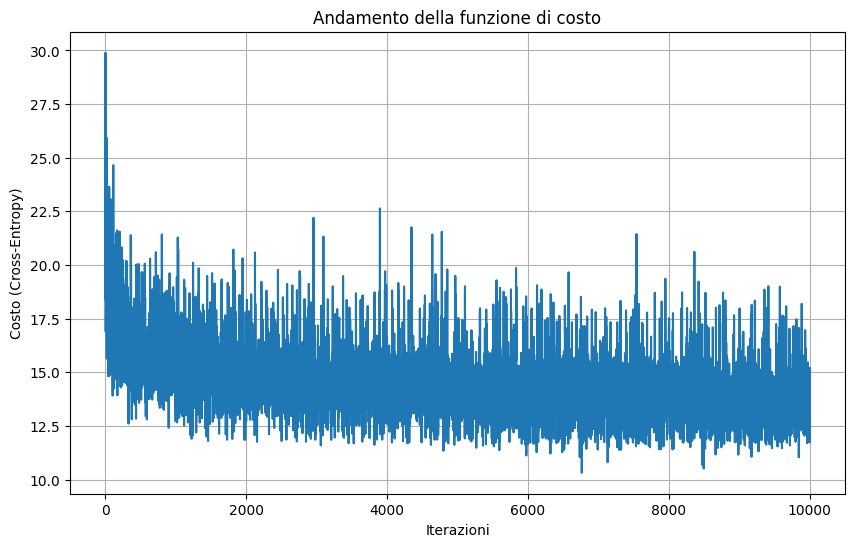

In [20]:
# Istanziazione del modello
logistic_model = MultinomialLogisticRegression(learning_rate=0.01, n_iterations=10000)
# Addestramento del modello
logistic_model.fit(X_train, y_train)
# Visualizzazione dell'andamento della funzione di costo
logistic_model.plot_cost_history()

### Normalizziamo

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classi: [0 1 2 3 4 5 6 7 8]
Avvio addestramento multinomiale...
Iterazione 0: Costo = 2.191814
Iterazione 100: Costo = 1.794392
Iterazione 200: Costo = 1.578333
Iterazione 300: Costo = 1.449633
Iterazione 400: Costo = 1.365178
Iterazione 500: Costo = 1.304980
Iterazione 600: Costo = 1.259215
Iterazione 700: Costo = 1.222701
Iterazione 800: Costo = 1.192504
Iterazione 900: Costo = 1.166849
Iterazione 1000: Costo = 1.144596
Iterazione 1100: Costo = 1.124978
Iterazione 1200: Costo = 1.107456
Iterazione 1300: Costo = 1.091639
Iterazione 1400: Costo = 1.077235
Iterazione 1500: Costo = 1.064019
Iterazione 1600: Costo = 1.051817
Iterazione 1700: Costo = 1.040489
Iterazione 1800: Costo = 1.029924
Iterazione 1900: Costo = 1.020029
Iterazione 2000: Costo = 1.010731
Iterazione 2100: Costo = 1.001964
Iterazione 2200: Costo = 0.993678
Iterazione 2300: Costo = 0.985827
Iterazione 2400: Costo = 0.978371
Iterazione 2500: Costo = 0.971279
Iterazione 2600: Costo = 0.964520
Iterazione 2700: Costo = 0.958

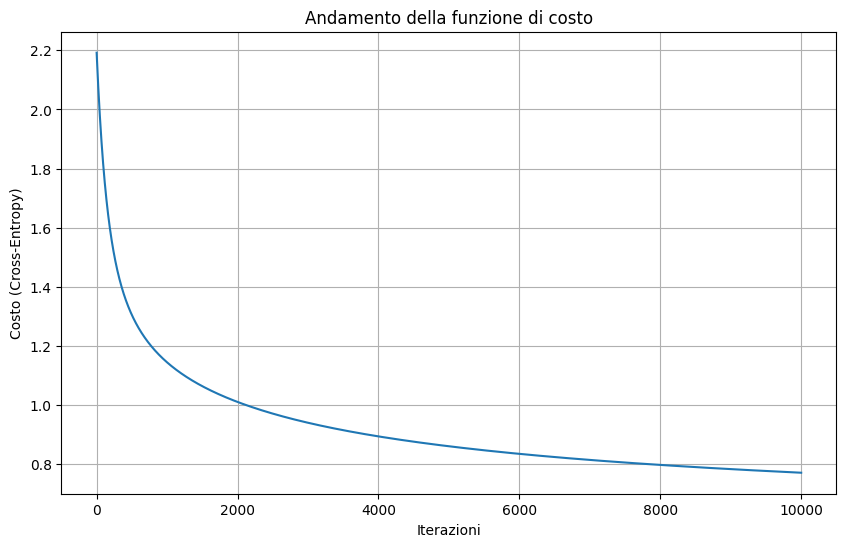

In [22]:
# Istanziazione del modello
logistic_model = MultinomialLogisticRegression(learning_rate=0.01, n_iterations=10000)
# Addestramento del modello
logistic_model.fit(X_train, y_train)
# Visualizzazione dell'andamento della funzione di costo
logistic_model.plot_cost_history()

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predizione sui dati di test
y_pred = logistic_model.predict(X_test)
# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sul test set: {accuracy:.4f}")

Accuracy sul test set: 0.6389


In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt

# Predizione sui dati di test
y_pred = logistic_model.predict(X_test)
# Calcolo accuracy, precision, recall e f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Stampa i risultati
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6389
Precision: 0.5921
Recall: 0.6389
F1 Score: 0.5767


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


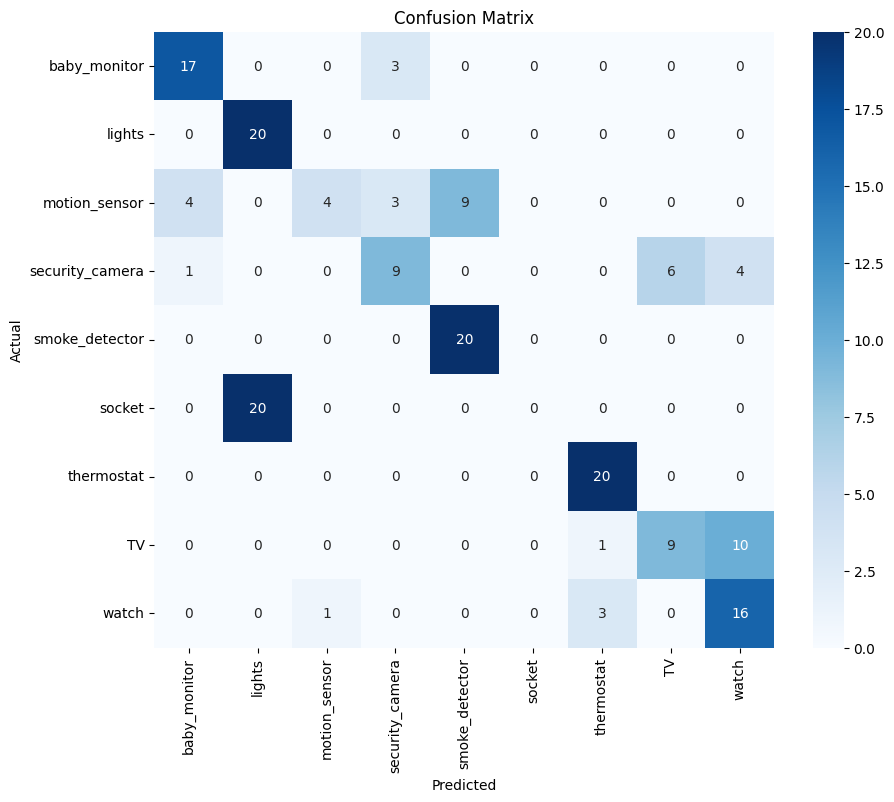

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predizione sui dati di test
y_pred = logistic_model.predict(X_test)

# Calcolo della matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=devices, 
            yticklabels=devices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy (sklearn): 0.7333


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Axes: >

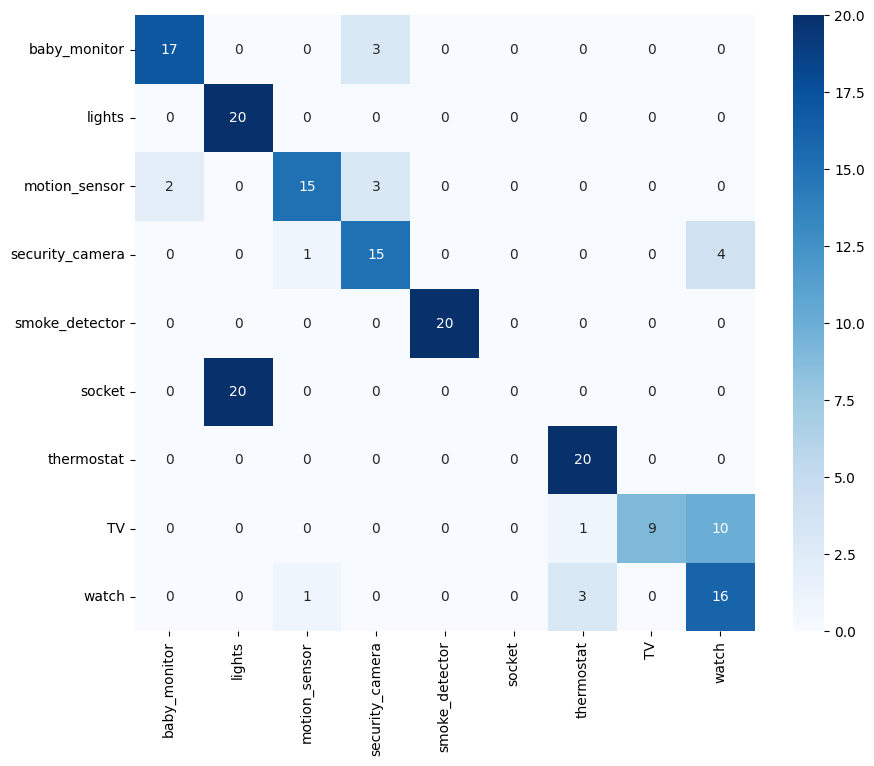

In [26]:
## Usiamo sklearn
from sklearn.linear_model import LogisticRegression
logistic_model_sklearn = LogisticRegression(multi_class='multinomial', max_iter=10000)
logistic_model_sklearn.fit(X_train, y_train)
y_pred_sklearn = logistic_model_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy (sklearn): {accuracy_sklearn:.4f}")
# Calcolo della matrice di confusione
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
# Visualizzazione della matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=devices, 
            yticklabels=devices)

In [27]:
# Confronto in termini di Precision e recall

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Stampa i risultati
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

precision_sklearn = precision_score(y_test, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='weighted')
f1_sklearn = f1_score(y_test, y_pred_sklearn, average='weighted')
# Stampa i risultati
print(f"Precision (sklearn): {precision_sklearn:.4f}")
print(f"Recall (sklearn): {recall_sklearn:.4f}")
print(f"F1 Score (sklearn): {f1_sklearn:.4f}")





Precision: 0.5921
Recall: 0.6389
F1 Score: 0.5767
Precision (sklearn): 0.7064
Recall (sklearn): 0.7333
F1 Score (sklearn): 0.6945


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SKLEARN OVA

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Inizializza il modello OVA
lr_ova = LogisticRegression(multi_class='ovr', max_iter=1000)

# Addestra il modello
lr_ova.fit(X_train, y_train)

# Fai predizioni
y_pred_ova = lr_ova.predict(X_test)

# Calcola l'accuratezza
ova_accuracy = accuracy_score(y_test, y_pred_ova)
precision_OVA = precision_score(y_test, y_pred_ova, average='weighted')
recall_OVA = recall_score(y_test, y_pred_ova, average='weighted')
f1_OVA = f1_score(y_test, y_pred_ova, average='weighted')
# Stampa i risultati
print(f"Precision OVA: {precision_OVA:.4f}")
print(f"Recall OVA: {recall_OVA:.4f}")
print(f"F1 Score OVA: {f1_OVA:.4f}")


Precision OVA: 0.6149
Recall OVA: 0.6333
F1 Score OVA: 0.5712


c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\luigi\python\ML_Course_2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


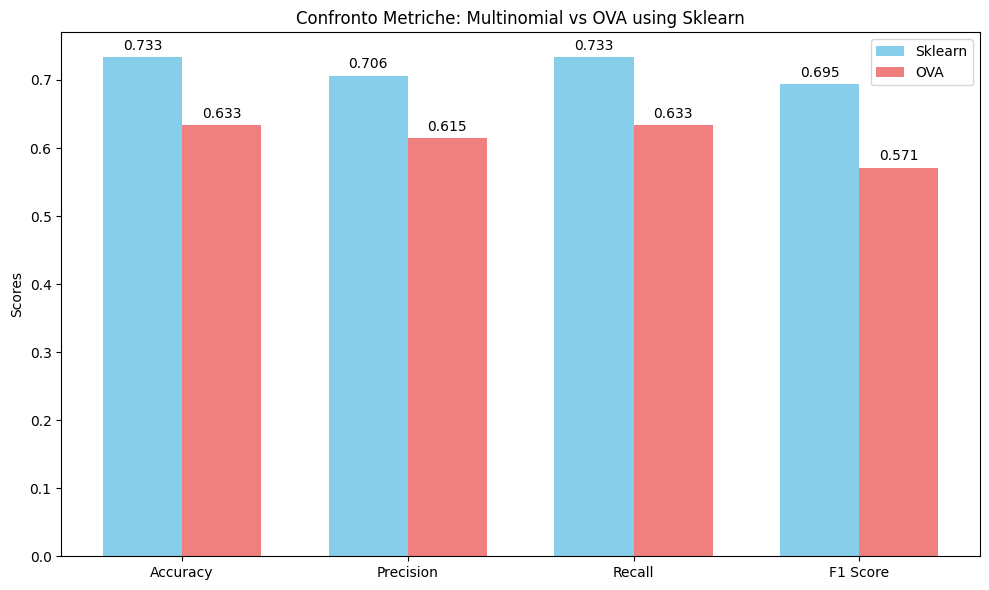

In [29]:
import numpy as np

import matplotlib.pyplot as plt

# Dati per il grafico
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
sklearn_values = [accuracy_sklearn, precision_sklearn, recall_sklearn, f1_sklearn]
ova_values = [ova_accuracy, precision_OVA, recall_OVA, f1_OVA]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, sklearn_values, width, label='Sklearn', color='skyblue')
rects2 = ax.bar(x + width/2, ova_values, width, label='OVA', color='lightcoral')

# Aggiungi testo sopra ogni barra
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Aggiungi etichette, titolo e legenda
ax.set_ylabel('Scores')
ax.set_title('Confronto Metriche: Multinomial vs OVA using Sklearn')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [30]:
# SOLUZIONE OVA

In [31]:
class LogisticRegressionOVA:
    """
    Implementazione One-vs-All (OVA) per la regressione logistica multiclasse
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Inizializzazione del modello
        
        Parametri:
        learning_rate: tasso di apprendimento per la discesa del gradiente
        n_iterations: numero di iterazioni per la discesa del gradiente
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.classifiers = []  # Lista di classificatori binari
        self.classes = None    # Classi uniche
    
    def fit(self, X, y):
        """
        Addestra un classificatore binario per ogni classe usando l'approccio OVA
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        y -- vettore delle etichette di shape (m,)
        """
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        print(f"Addestramento di {n_classes} classificatori OVA...")
        
        # Aggiungiamo una colonna di 1 per il termine di bias
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Addestriamo un classificatore per ogni classe
        for i, c in enumerate(self.classes):
            print(f"\nClassificatore per classe {c} vs resto:")
            
            # Creiamo etichette binarie: 1 per la classe corrente, 0 per tutte le altre
            y_binary = np.where(y == c, 1, 0)
            
            # Creiamo e addestriamo il classificatore
            classifier = self._train_binary_classifier(X_bias, y_binary)
            self.classifiers.append(classifier)
            
            # Calcoliamo l'accuratezza sul training set
            y_pred = self._predict_binary(X_bias, classifier) >= 0.5
            accuracy = np.mean(y_pred == y_binary)
            print(f"Accuratezza per classe {c}: {accuracy:.4f}")
        
        print("\nAddestramento OVA completato!")
    
    def _train_binary_classifier(self, X, y):
        """
        Addestra un singolo classificatore binario
        
        Parametri:
        X -- matrice delle feature con bias di shape (m, n+1)
        y -- vettore delle etichette binarie di shape (m,)
        
        Restituisce:
        weights -- pesi ottimizzati del classificatore
        """
        m, n = X.shape
        weights = np.zeros(n)
        
        for i in range(self.n_iterations):
            # Calcolo della previsione
            z = np.dot(X, weights)
            h = self._sigmoid(z)
            
            # Calcolo del gradiente
            gradient = 1/m * np.dot(X.T, (h - y))
            
            # Aggiornamento dei pesi
            weights = weights - self.learning_rate * gradient
            
            # Stampa periodica del costo
            if (i % 200 == 0) or (i == self.n_iterations - 1):
                cost = self._compute_cost(X, y, weights)
                print(f"  Iterazione {i}: Costo = {cost:.6f}")
        
        return weights
    
    def _sigmoid(self, z):
        """
        Funzione sigmoide: trasforma un numero reale in una probabilità (0-1)
        """
        # Limitiamo z per evitare overflow/underflow numerici
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _compute_cost(self, X, y, weights):
        """
        Calcola la funzione di costo (log loss)
        
        J(w) = -1/m * sum(y*log(h) + (1-y)*log(1-h))
        """
        m = X.shape[0]
        h = self._predict_binary(X, weights)
        
        # Per evitare log(0)
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    
    def _predict_binary(self, X, weights):
        """
        Calcola la probabilità per un classificatore binario
        """
        z = np.dot(X, weights)
        return self._sigmoid(z)
    
    def predict_proba(self, X):
        """
        Calcola le probabilità per tutte le classi
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        
        Restituisce:
        probs -- matrice di probabilità di shape (m, n_classes)
        """
        # Aggiungiamo una colonna di 1 per il termine di bias
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        probs = np.zeros((n_samples, n_classes))
        
        # Calcoliamo le probabilità per ogni classe
        for i, classifier in enumerate(self.classifiers):
            probs[:, i] = self._predict_binary(X_bias, classifier)
        
        # Normalizziamo le probabilità per avere somma 1
        probs = probs / np.sum(probs, axis=1, keepdims=True)
        
        return probs
    
    def predict(self, X):
        """
        Predice la classe con la probabilità più alta
        
        Parametri:
        X -- matrice delle feature di shape (m, n)
        
        Restituisce:
        y_pred -- vettore delle classi predette di shape (m,)
        """
        probs = self.predict_proba(X)
        return self.classes[np.argmax(probs, axis=1)]

In [32]:
from sklearn.model_selection import train_test_split

# Dividi il dataframe in set di addestramento e test con stratificazione
X = cleaned_df.drop(columns=['device_category'])
y = cleaned_df['device_category']

# Utilizza train_test_split con stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Visualizza le dimensioni dei set di addestramento e test
print(f"Dimensioni del set di addestramento: {X_train.shape}")
print(f"Dimensioni del set di test: {X_test.shape}")

Dimensioni del set di addestramento: (720, 9)
Dimensioni del set di test: (180, 9)


In [33]:
y_train.reset_index(drop=True, inplace=True)

In [34]:
# Istanziazione del modello
logistic_model = LogisticRegressionOVA(learning_rate=0.01, n_iterations=10000)
# Addestramento del modello
logistic_model.fit(X_train, y_train)


Addestramento di 9 classificatori OVA...

Classificatore per classe 0 vs resto:
  Iterazione 0: Costo = 3.837642
  Iterazione 200: Costo = 0.615718
  Iterazione 400: Costo = 0.558485
  Iterazione 600: Costo = 0.553418
  Iterazione 800: Costo = 0.540434
  Iterazione 1000: Costo = 0.558386
  Iterazione 1200: Costo = 0.552977
  Iterazione 1400: Costo = 0.543765
  Iterazione 1600: Costo = 0.533325
  Iterazione 1800: Costo = 0.554724
  Iterazione 2000: Costo = 0.588154
  Iterazione 2200: Costo = 0.598790
  Iterazione 2400: Costo = 0.548659
  Iterazione 2600: Costo = 0.564875
  Iterazione 2800: Costo = 0.835573
  Iterazione 3000: Costo = 0.547197
  Iterazione 3200: Costo = 0.575648
  Iterazione 3400: Costo = 0.550119
  Iterazione 3600: Costo = 0.559018
  Iterazione 3800: Costo = 0.575683
  Iterazione 4000: Costo = 0.575648
  Iterazione 4200: Costo = 0.623620
  Iterazione 4400: Costo = 0.575648
  Iterazione 4600: Costo = 0.532532
  Iterazione 4800: Costo = 0.575671
  Iterazione 5000: Costo = 

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predizione sui dati di test
y_pred = logistic_model.predict(X_test)
# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sul test set: {accuracy:.4f}")

Accuracy sul test set: 0.3556


In [36]:
from sklearn.preprocessing import MinMaxScaler

# Inizializza lo scaler MinMaxScaler
scaler = MinMaxScaler()

# Adatta lo scaler ai dati di training e trasforma sia il training set che il test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converti gli array NumPy in DataFrame di pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [37]:
# Istanziazione del modello
logistic_model = LogisticRegressionOVA(learning_rate=0.01, n_iterations=10000)
# Addestramento del modello
y_pred = logistic_model.fit(X_test_scaled, y_test)

Addestramento di 9 classificatori OVA...

Classificatore per classe 0 vs resto:
  Iterazione 0: Costo = 0.690052
  Iterazione 200: Costo = 0.442843
  Iterazione 400: Costo = 0.399855
  Iterazione 600: Costo = 0.384471
  Iterazione 800: Costo = 0.375300
  Iterazione 1000: Costo = 0.368030
  Iterazione 1200: Costo = 0.361528
  Iterazione 1400: Costo = 0.355449
  Iterazione 1600: Costo = 0.349674
  Iterazione 1800: Costo = 0.344157
  Iterazione 2000: Costo = 0.338872
  Iterazione 2200: Costo = 0.333805
  Iterazione 2400: Costo = 0.328943
  Iterazione 2600: Costo = 0.324277
  Iterazione 2800: Costo = 0.319797
  Iterazione 3000: Costo = 0.315494
  Iterazione 3200: Costo = 0.311360
  Iterazione 3400: Costo = 0.307388
  Iterazione 3600: Costo = 0.303570
  Iterazione 3800: Costo = 0.299900
  Iterazione 4000: Costo = 0.296370
  Iterazione 4200: Costo = 0.292974
  Iterazione 4400: Costo = 0.289708
  Iterazione 4600: Costo = 0.286563
  Iterazione 4800: Costo = 0.283537
  Iterazione 5000: Costo = 

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predizione sui dati di test
y_pred = logistic_model.predict(X_test)
# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sul test set: {accuracy:.4f}")

Accuracy sul test set: 0.2111
